In [97]:
import pandas as pd
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import cufflinks as cf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline
init_notebook_mode(connected=True)

In [110]:
df_ = pd.read_json('News_Category_Dataset_v2.json', lines=True)

df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
category             200853 non-null object
headline             200853 non-null object
authors              200853 non-null object
link                 200853 non-null object
short_description    200853 non-null object
date                 200853 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [78]:
df_.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


Eliminando columnas innecesarias y creando columna texto

In [122]:
df_.query('category == "PARENTS" or category == "PARENTING"')

,category,headline,authors,link,short_description,date
6194,PARENTS,40 Tweets That Sum Up Life With 4-Year-Olds,Caroline Bologna,https://www.huffingtonpost.com/entry/40-tweets...,"""Hell hath no fury like a 4yo whose apple slic...",2018-02-06
6524,PARENTS,These Were The Trendiest Baby Names In The Lat...,Caroline Bologna,https://www.huffingtonpost.com/entry/these-wer...,Shout out to the Jessicas and Ambers of the wo...,2018-01-31
6625,PARENTS,"These Quotes From Kids Are Hilarious, Adorable...",Caroline Bologna,https://www.huffingtonpost.com/entry/hilarious...,"""Mommy, this song sounds a lot like the McDonn...",2018-01-30
6848,PARENTS,30 'Star Wars'-Inspired Names Parents Are Givi...,Caroline Bologna,https://www.huffingtonpost.com/entry/star-wars...,Get ready to meet some more Kylos and Anakins.,2018-01-26
6955,PARENTS,Parents Are Honoring Their Favorite Musicians ...,Caroline Bologna,https://www.huffingtonpost.com/entry/musician-...,From Wilco and Beyonce to Jagger and Bowie.,2018-01-24
...,...,...,...,...,...,...
200726,PARENTING,Awesomely Geeky Dad Dicken Schrader Collaborat...,,https://www.huffingtonpost.com/entry/dicken-sc...,All the ingredients for a classic embarrassing...,2012-01-29
200738,PARENTING,Backyard Boys,"Janell Burley Hofmann, Contributor\nAuthor of ...",https://www.huffingtonpost.com/entry/backyard-...,"Long before leadership courses, sensitivity tr...",2012-01-29
200789,PARENTING,With Friends Like These,"Devon Corneal, Contributor\nMother, writer, la...",https://www.huffingtonpost.com/entry/mom-frien...,I didn't appreciate the freedom of introducing...,2012-01-28
200791,PARENTING,Confession: This Pediatrician Is a Sleep Softie,"Claire McCarthy, M.D., Contributor\nPediatrici...",https://www.huffingtonpost.com/entry/co-sleepi...,This may not be a great confession to make as ...,2012-01-28


In [132]:
df_['text'] = df_['authors'] +' '+df_['headline'] +' '+ df_['short_description']

df = df_.drop(['link', 'date'], axis=1)

print(df.loc[0][['authors', 'headline', 'short_description', 'text']])
print(df.loc[0]['headline'])

authors                                                Melissa Jeltsen
headline             There Were 2 Mass Shootings In Texas Last Week...
short_description    She left her husband. He killed their children...
text                 Melissa Jeltsen There Were 2 Mass Shootings In...
Name: 0, dtype: object
There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV


In [136]:
df[['authors', 'headline', 'short_description', 'text']].head(30)

,authors,headline,short_description,text
0,Melissa Jeltsen,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,Melissa Jeltsen There Were 2 Mass Shootings In...
1,Andy McDonald,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,Andy McDonald Will Smith Joins Diplo And Nicky...
2,Ron Dicker,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,Ron Dicker Hugh Grant Marries For The First Ti...
3,Ron Dicker,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,Ron Dicker Jim Carrey Blasts 'Castrato' Adam S...
4,Ron Dicker,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",Ron Dicker Julianna Margulies Uses Donald Trum...
5,Ron Dicker,Morgan Freeman 'Devastated' That Sexual Harass...,"""It is not right to equate horrific incidents ...",Ron Dicker Morgan Freeman 'Devastated' That Se...
6,Ron Dicker,Donald Trump Is Lovin' New McDonald's Jingle I...,"It's catchy, all right.",Ron Dicker Donald Trump Is Lovin' New McDonald...
7,Todd Van Luling,What To Watch On Amazon Prime That’s New This ...,There's a great mini-series joining this week.,Todd Van Luling What To Watch On Amazon Prime ...
8,Andy McDonald,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,"Myer's kids may be pushing for a new ""Powers"" ...",Andy McDonald Mike Myers Reveals He'd 'Like To...
9,Todd Van Luling,What To Watch On Hulu That’s New This Week,You're getting a recent Academy Award-winning ...,Todd Van Luling What To Watch On Hulu That’s N...


Visualizando los datos

In [115]:
print(len(df_.category.value_counts()), len(df.category.value_counts()))

41 37


In [118]:
df_.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [116]:
#defining data
trace = go.Bar(x = list(df['category'].unique()),y=df['category'].value_counts())
data=[trace]
#defining layout
layout = go.Layout(title='Categories count',xaxis=dict(title='Category'))
#defining figure and plotting
figure = go.Figure(data=data,layout=layout)
iplot(figure)

Se puede observar que muchas de las categorías podrían unirse en una sola, como es el caso de  ARTS, CULTURE & ARTS Y ARTS & CULTURE

In [117]:
df[df['category'] == 'PARENTING']['text'].iloc[20]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/danielsiervo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-117-580d4c7a15a6>", line 1, in <module>
    df[df['category'] == 'PARENTING']['text'].iloc[20]
  File "/Users/danielsiervo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 1424, in __getitem__
    return self._getitem_axis(maybe_callable, axis=axis)
  File "/Users/danielsiervo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2157, in _getitem_axis
    self._validate_integer(key, axis)
  File "/Users/danielsiervo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2088, in _validate_integer
    raise IndexError("single positional indexer is out-of-bounds")
IndexError: single positional indexer is out-of-bounds

During handling of the above exception, another exception occurred:

Trac

IndexError: single positional indexer is out-of-bounds

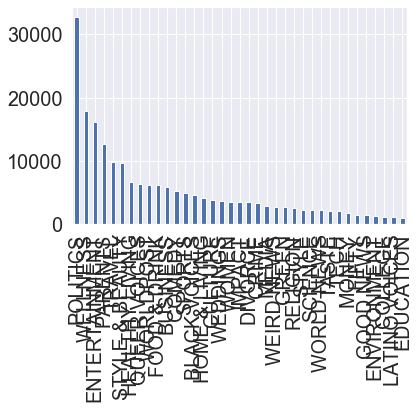

In [177]:
culture = ['ARTS & CULTURE', 'ARTS', 'CULTURE & ARTS']
worldpost = ['WORLDPOST', 'THE WORLDPOST']
parents = ['PARENTING', 'PARENTS']

df['category'][df['category'].isin(culture)] = "CULTURE"
df['category'][df['category'].isin(worldpost)] = "WORLDPOST"
df['category'][df['category'].isin(parents)] = "PARENTS"

df['category'].value_counts().plot(kind='bar')

In [138]:
cat = df['category'].value_counts()
print(len(cat))
print(cat)

37
POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
PARENTS           12632
TRAVEL             9887
STYLE & BEAUTY     9649
HEALTHY LIVING     6694
QUEER VOICES       6314
WORLDPOST          6243
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
CULTURE            3878
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
FIFTY              1401
GOOD NEWS          1398
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
EDUCATION          1004
Name: category, dtype: int64


In [139]:
(cat['POLITICS'] + cat['WELLNESS'] + cat['ENTERTAINMENT'])/cat.sum()*100

33.17052769936222

## Feature Engineering

### text cleaning

In [ ]:
df.loc[3]['text']

In [ ]:
df.loc[300]['text']

In [ ]:
df.loc[3000]['text']

In [ ]:
df.loc[29864]['text']

In [ ]:
df.loc[123678]['text']

## Categories in weekday

In [183]:
df["weekday"] = pd.to_datetime(df_["date"]).dt.date.apply(lambda x: x.weekday())

def int2weekday(x):
    days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    return days[x]

df["weekday"] = df["weekday"].apply(int2weekday)

In [184]:
heat_map = df.groupby(["weekday", "category"]).size().reset_index(name="data")

heat_map['norm'] = heat_map['data'] / heat_map.groupby('category')['data'].transform('sum')


heat_map.tail()

,weekday,category,data,norm
254,Wed,WEIRD NEWS,339,0.126966
255,Wed,WELLNESS,3212,0.180176
256,Wed,WOMEN,538,0.154155
257,Wed,WORLD NEWS,382,0.175471
258,Wed,WORLDPOST,639,0.102355


In [185]:
heat_map2 = heat_map.pivot("weekday", "category", "norm").fillna(0).reindex(["Mon",
                                                    "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"][::-1])
heat_map2.head(10)

category,BLACK VOICES,BUSINESS,COLLEGE,COMEDY,CRIME,CULTURE,DIVORCE,EDUCATION,ENTERTAINMENT,ENVIRONMENT,...,STYLE & BEAUTY,TASTE,TECH,TRAVEL,WEDDINGS,WEIRD NEWS,WELLNESS,WOMEN,WORLD NEWS,WORLDPOST
weekday,,,,,,,,,,,,,,,,,,,,,
Sun,0.140018,0.215092,0.125874,0.174493,0.179148,0.166065,0.023643,0.152390,0.169012,0.489040,...,0.086952,0.098282,0.195005,0.079397,0.028759,0.107865,0.063892,0.058739,0.109325,0.206792
Sat,0.118595,0.214418,0.103147,0.184541,0.207048,0.231047,0.056626,0.128486,0.174368,0.439153,...,0.067054,0.105916,0.216619,0.070901,0.072309,0.163296,0.060751,0.078510,0.070740,0.205190
Fri,0.140459,0.109651,0.129371,0.133333,0.123642,0.120939,0.195563,0.120518,0.127538,0.010582,...,0.155975,0.166508,0.102786,0.163042,0.179951,0.179026,0.172828,0.197994,0.146991,0.137434
Thu,0.153931,0.112515,0.158217,0.136425,0.131571,0.109850,0.192061,0.131474,0.130215,0.005291,...,0.156700,0.159351,0.110951,0.173764,0.185703,0.139326,0.174511,0.163037,0.169499,0.110844
Wed,0.156140,0.109314,0.159091,0.131401,0.116006,0.123259,0.194396,0.141434,0.120065,0.008314,...,0.168722,0.176527,0.119597,0.168403,0.190907,0.126966,0.180176,0.154155,0.175471,0.102355
Tue,0.141564,0.116557,0.164336,0.134686,0.116593,0.113203,0.179218,0.145418,0.133142,0.009826,...,0.188724,0.141221,0.119597,0.177607,0.175842,0.148689,0.169967,0.187966,0.179146,0.107961
Mon,0.149293,0.122452,0.159965,0.105121,0.125991,0.135637,0.158494,0.180279,0.145659,0.037793,...,0.175873,0.152195,0.135447,0.166886,0.166530,0.134831,0.177876,0.159599,0.148829,0.129425


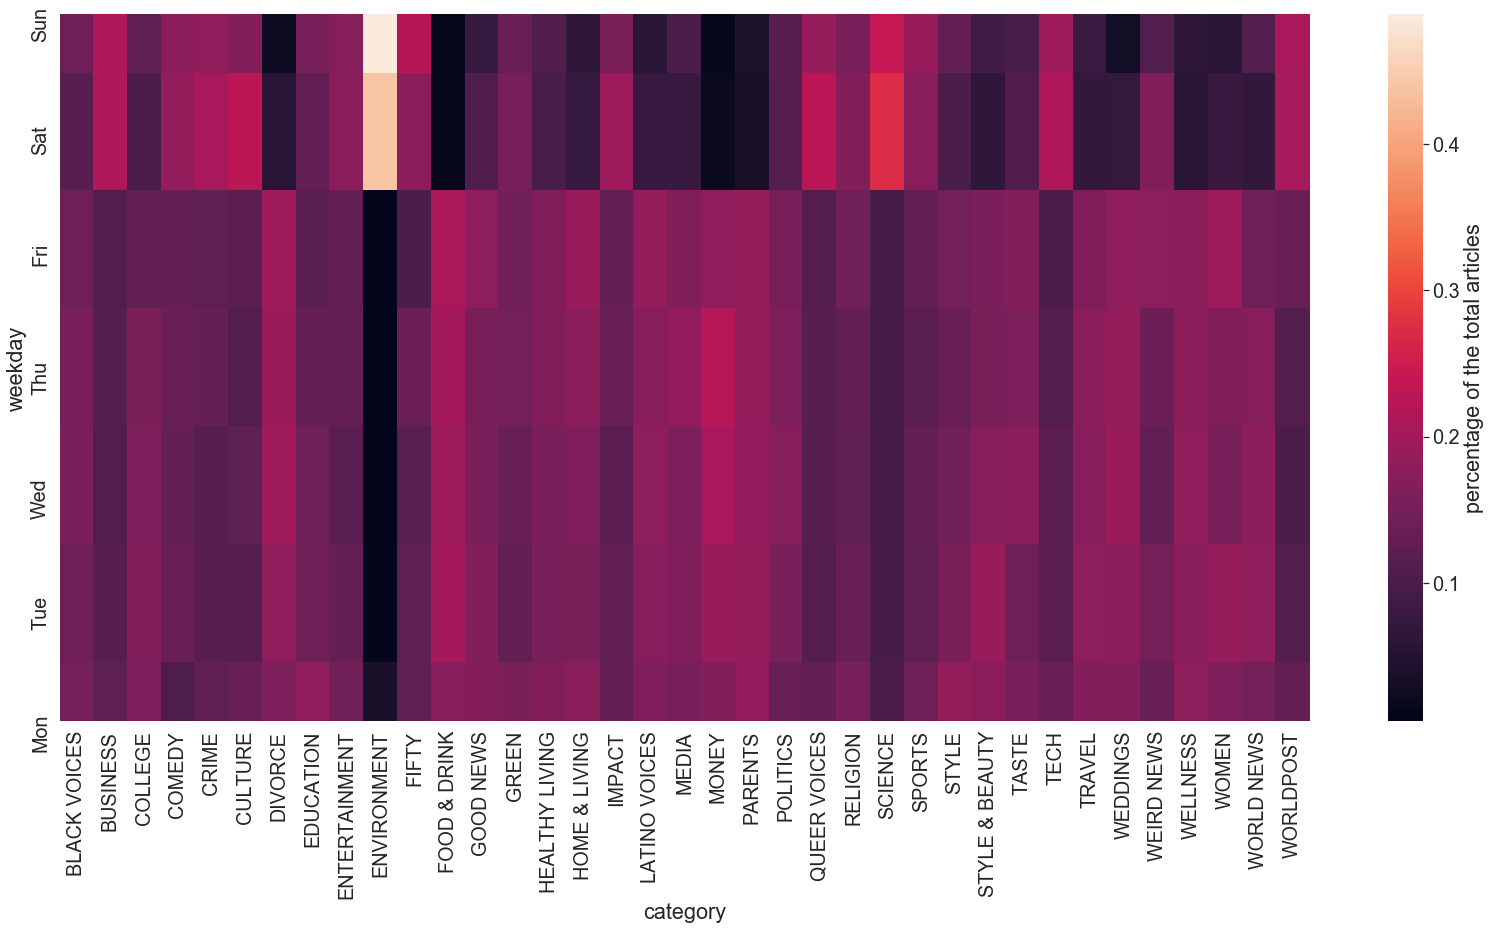

In [186]:
import seaborn as sns
import matplotlib as pl
sns.set(font_scale=1.8)
%matplotlib inline
fig, ax = plt.subplots(figsize=(28,13))
#plt.xticks(fontsize=14)
ax.set_ylim(-0.5, 7+0.5)
sns.heatmap(heat_map2, cbar_kws={'label': 'percentage of the total articles'}, ax=ax)


## Categories and author

In [144]:
authors = df.groupby(['authors', 'category']).size().reset_index(name='data')

authors['norm'] = authors['data'] / authors.groupby('category')['data'].transform('sum')
authors['authors'].replace(r'^\s*$', 'UNK', regex=True, inplace=True)
authors.head()

,authors,category,data,norm
0,UNK,BLACK VOICES,1006,0.222173
1,UNK,BUSINESS,989,0.166582
2,UNK,COLLEGE,111,0.097028
3,UNK,COMEDY,729,0.140870
4,UNK,CRIME,953,0.279883


In [145]:
authors2 = authors.pivot('authors', 'category', 'data').fillna(0)

authors2.head()

category,BLACK VOICES,BUSINESS,COLLEGE,COMEDY,CRIME,CULTURE,DIVORCE,EDUCATION,ENTERTAINMENT,ENVIRONMENT,...,STYLE & BEAUTY,TASTE,TECH,TRAVEL,WEDDINGS,WEIRD NEWS,WELLNESS,WOMEN,WORLD NEWS,WORLDPOST
authors,,,,,,,,,,,,,,,,,,,,,
"Basil Kreimendahl, Contributor\nPlaywright",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Bill Bigelow, ContributorRethinking Schools curriculum editor, Zinn Education Project c...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Bustle, Contributor\nNews, entertainment, lifestyle site",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"Bustle, ContributorNews, entertainment, lifestyle site",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"Cristian Farias, Elise Foley, and Willa Frej",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


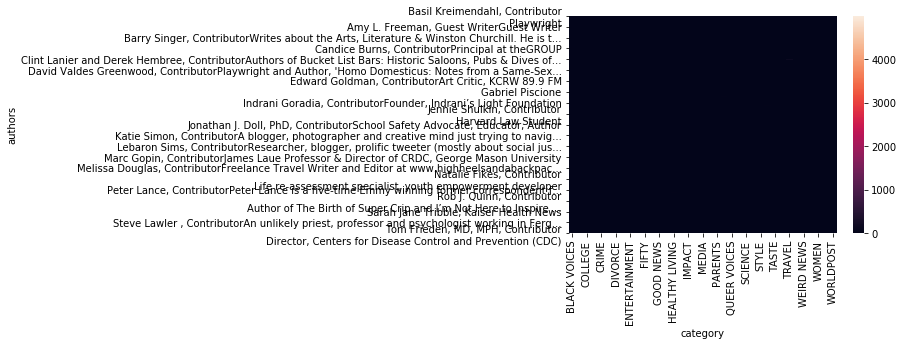

In [146]:
ax = sns.heatmap(authors2)

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], df['category'])

In [148]:
train = pd.concat([X_train, Y_train], axis=1)
test = pd.concat([X_test, Y_test], axis=1)
test.head()

,text,category
123499,My Mother Is Better At Online Dating Than Me,WOMEN
194916,Russia's 'Gay Propaganda' Crackdown: Will Pro...,QUEER VOICES
24880,"Anders Emil Møller, ContributorI'm the managin...",BUSINESS
180349,"Lynn Toler, Contributor\nDivorce Court Host an...",WEDDINGS
146213,"Doug and Leslie Gustafson, Contributor\nAuthor...",WEDDINGS


In [164]:
a = [1,2,3,4]

In [168]:
a[::-1]

[4, 3, 2, 1]